In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_style('white')
sns.despine(left=True, bottom = True)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline


font = {'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

import warnings

warnings.filterwarnings('ignore')

In [2]:
service = pd.read_csv('Data/직영.csv',encoding='cp949', index_col=0)
service['보호소'] = '직영보호소'
money = pd.read_csv('Data/위탁.csv',encoding='cp949',index_col=0)
money['보호소'] = '위탁보호소'

In [3]:
RAW = pd.concat([service,money], axis=0, ignore_index=True)
RAW.to_csv('Data/#10_Final_Check_직영_위탁추가.csv',encoding='cp949')

In [4]:
# dataset _ 중성화 여부 날린 RAW_DATA
dataset =pd.read_csv('Data/#10_Final_Check_직영_위탁추가.csv',encoding='cp949',index_col=0)
dataset = dataset[dataset['품종'] != 3]
dataset = dataset[dataset['중성화여부'] != 1]


# 정규화랑 Scale까지 한 Data

# 정규화 Scale 안한, mix_견이 아닌 DATA

df_no_mix = dataset


df_no_mix['색상'] = df_no_mix['색상'].map({1:'흰색',2:'검정색',3:'노란색',4:'갈색',5:'혼합'})
df_no_mix['품종'] = df_no_mix['품종'].map({5:'Sporting', 4:'Non-Sporting', 7:'Toy', 6:'Terrier',8:'Working', 0:'F.S.S',2:'Hound',1:'Herding',9:'E.T.C'})
df_no_mix['성별'] = df_no_mix['성별'].map({0:'수컷',1:'암컷'})
df_no_mix['중성화여부'] = df_no_mix['중성화여부'].map({0:'중성화 X', 2:'중성화 O'})
df_no_mix['상태'] = df_no_mix['상태'].map({1:'입양 O', 0:'입양 X'})

df_no_mix.to_csv('Data/#시각화용.csv',encoding='cp949')

#### Column별 Category 한글로 바꿔놓기

In [5]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제



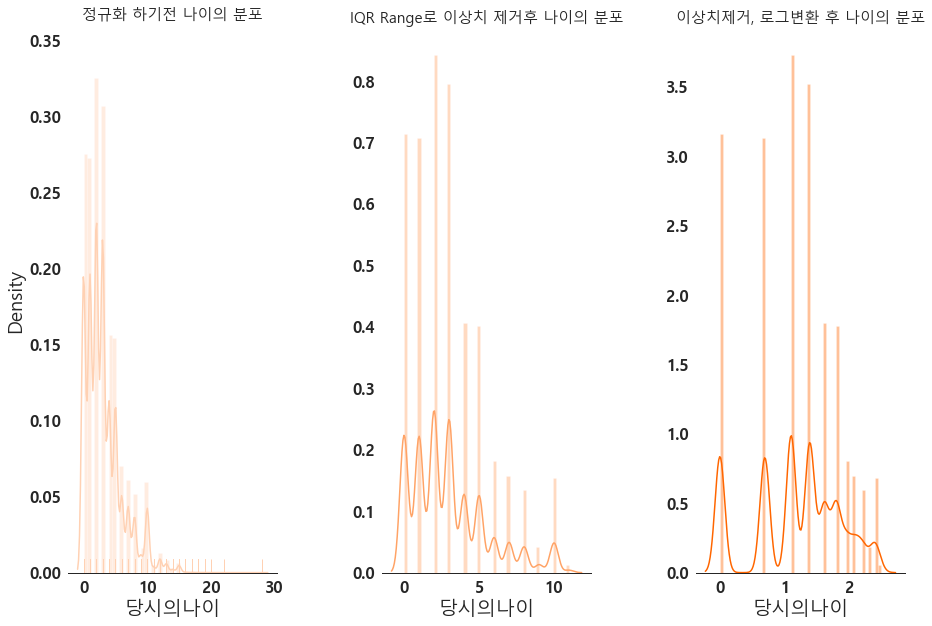

In [6]:

df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)


fig, axes = plt.subplots(1,3, figsize=(15,10))

sns.despine(left=True, right=True, top=True)

sns.distplot(df_no_mix['당시의나이'], color='#ffd1b3', ax = axes[0] , rug=True)
axes[0].set_title('정규화 하기전 나이의 분포', pad=10, fontsize= 15)

get_outlier_idx = get_outlier(df=df_no_mix, column='당시의나이', weight=1.5)
df_no_mix.drop(get_outlier_idx,axis=0, inplace=True)

sns.distplot(df_no_mix['당시의나이'], color='#ffa366', ax=axes[1])
axes[1].set_title('IQR Range로 이상치 제거후 나이의 분포', fontsize=15)
axes[1].set_ylabel('')

sns.distplot(np.log1p(df_no_mix['당시의나이']), color='#ff6600', ax =axes[2])
axes[2].set_title('이상치제거, 로그변환 후 나이의 분포',fontsize=15)
axes[2].set_ylabel('')


plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


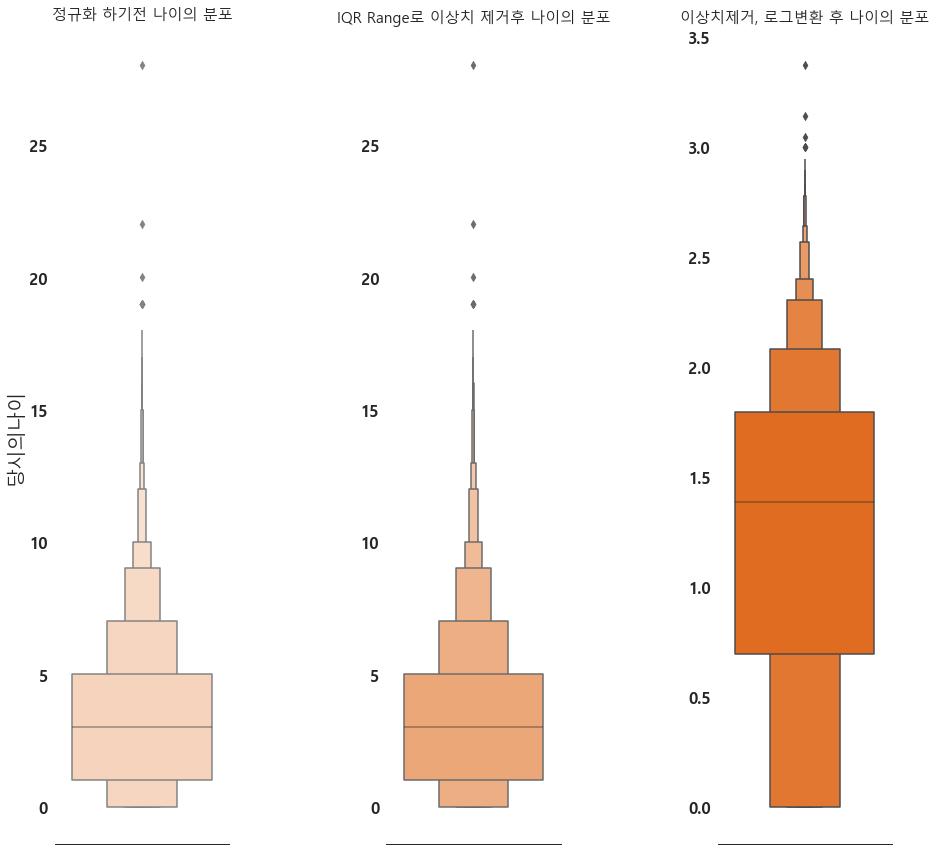

In [7]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)


fig, axes = plt.subplots(1,3, figsize=(15,15))

sns.despine(left=True, right=True, top=True)

sns.boxenplot(y=df_no_mix['당시의나이'], orient='v', color='#ffd1b3', ax = axes[0])
axes[0].set_title('정규화 하기전 나이의 분포', pad=10, fontsize= 15)

get_outlier_idx = get_outlier(df=df_no_mix, column='체중', weight=1.5)
df_no_mix.drop(get_outlier_idx,axis=0, inplace=True)

sns.boxenplot(y = df_no_mix['당시의나이'], color='#ffa366', ax=axes[1])
axes[1].set_title('IQR Range로 이상치 제거후 나이의 분포', fontsize=15)
axes[1].set_ylabel('')

sns.boxenplot(y = np.log1p(df_no_mix['당시의나이']), color='#ff6600', ax =axes[2])    
axes[2].set_title('이상치제거, 로그변환 후 나이의 분포',fontsize=15)
axes[2].set_ylabel('')

plt.subplots_adjust(wspace= 0.9, hspace=0.5)
plt.show()


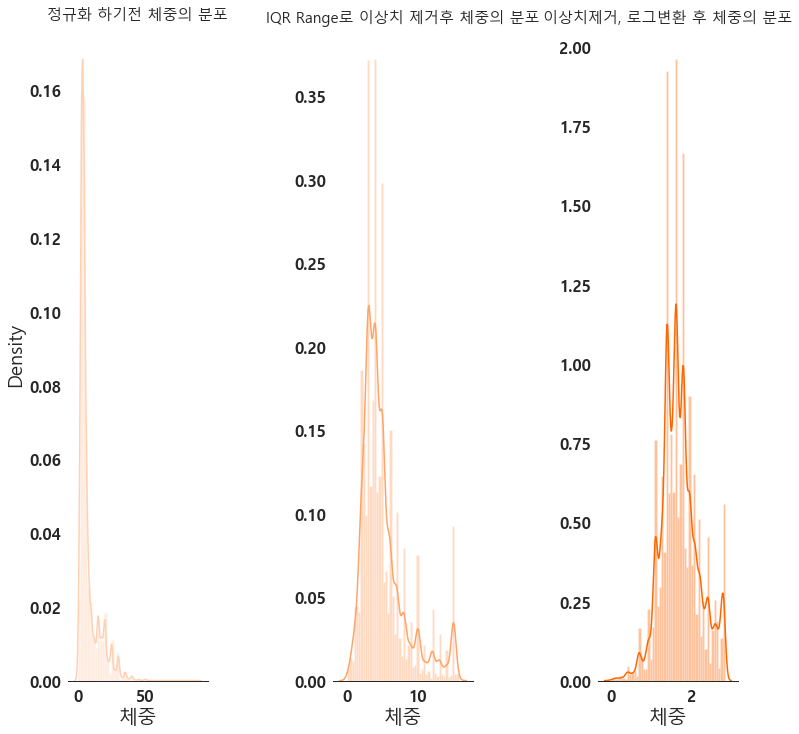

In [8]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
fig, axes = plt.subplots(1,3, figsize=(12,12))

sns.despine(left=True, right=True, top=True)

sns.distplot(df_no_mix['체중'], color='#ffd1b3', ax = axes[0])
axes[0].set_title('정규화 하기전 체중의 분포', pad=10, fontsize= 15)

get_outlier_idx = get_outlier(df=df_no_mix, column='체중', weight=1.5)
df_no_mix.drop(get_outlier_idx,axis=0, inplace=True)

sns.distplot(df_no_mix['체중'], color='#ffa366', ax=axes[1])
axes[1].set_title('IQR Range로 이상치 제거후 체중의 분포', fontsize=15)
axes[1].set_ylabel('')

sns.distplot(np.log1p(df_no_mix['체중']), color='#ff6600', ax =axes[2])
            
axes[2].set_title('이상치제거, 로그변환 후 체중의 분포',fontsize=15)
axes[2].set_ylabel('')

plt.subplots_adjust(wspace= 0.9, hspace=0.5)
plt.show()



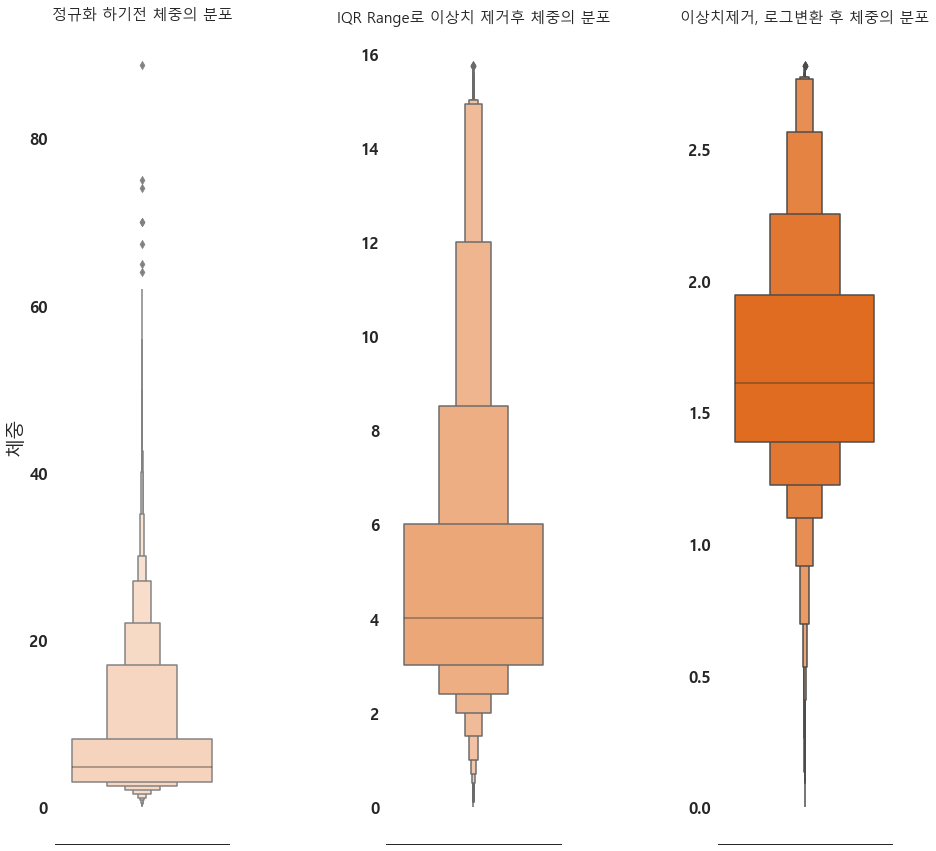

In [9]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)


fig, axes = plt.subplots(1,3, figsize=(15,15))

sns.despine(left=True, right=True, top=True)

sns.boxenplot(y=df_no_mix['체중'], orient='v', color='#ffd1b3', ax = axes[0])
axes[0].set_title('정규화 하기전 체중의 분포', pad=10, fontsize= 15)

get_outlier_idx = get_outlier(df=df_no_mix, column='체중', weight=1.5)
df_no_mix.drop(get_outlier_idx,axis=0, inplace=True)

sns.boxenplot(y = df_no_mix['체중'], color='#ffa366', ax=axes[1])
axes[1].set_title('IQR Range로 이상치 제거후 체중의 분포', fontsize=15)
axes[1].set_ylabel('')

sns.boxenplot(y = np.log1p(df_no_mix['체중']), color='#ff6600', ax =axes[2])    
axes[2].set_title('이상치제거, 로그변환 후 체중의 분포',fontsize=15)
axes[2].set_ylabel('')

plt.subplots_adjust(wspace= 0.9, hspace=0.5)
plt.show()


### 여기서 부터 색깔 바꾸기
---

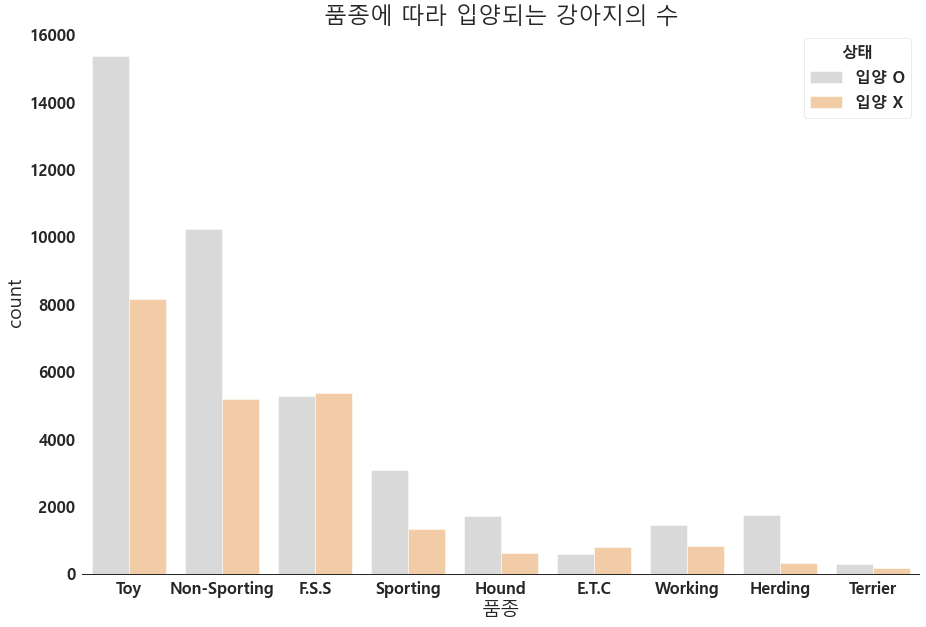

In [10]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)


plt.figure(figsize=(15,10))
sns.countplot('품종', data=df_no_mix, hue='상태', palette=["#d9d9d9",'#ffcc99'])
plt.title('품종에 따라 입양되는 강아지의 수')
sns.despine(left=True, right=True, top=True)
plt.show()

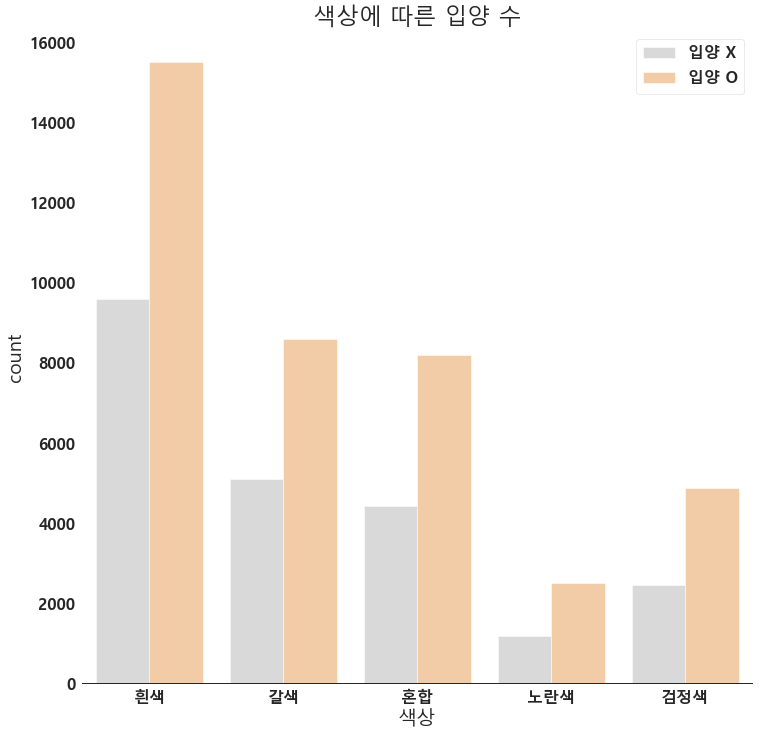

In [13]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})

plt.figure(figsize=(12,12))
sns.countplot(x='색상' , data=df_no_mix, hue='상태',palette=["#d9d9d9",'#ffcc99'])
sns.despine(left=True, right=True, top=True)
plt.title('색상에 따른 입양 수')
plt.legend(['입양 X', '입양 O'])


plt.show()

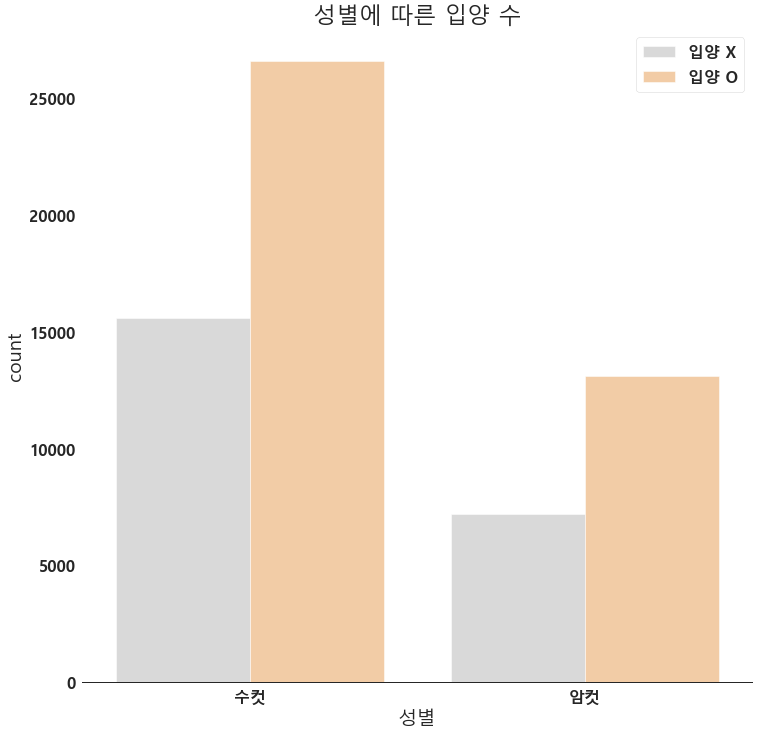

In [14]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})

plt.figure(figsize=(12,12))
sns.countplot(x='성별' , data=df_no_mix, hue='상태',palette=["#d9d9d9",'#ffcc99'])
sns.despine(left=True, right=True, top=True)
plt.title('성별에 따른 입양 수')
plt.legend(['입양 X', '입양 O'])


plt.show()

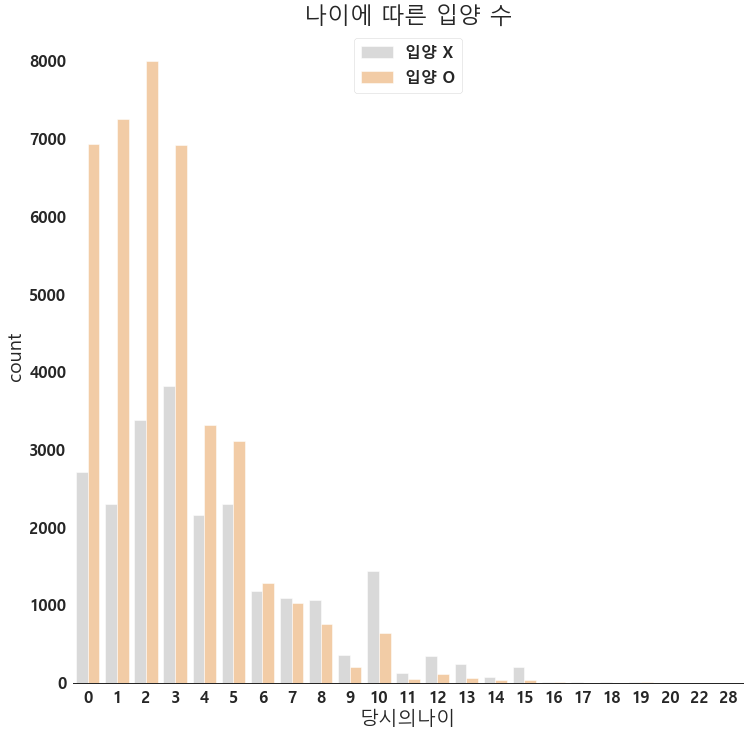

In [15]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})

plt.figure(figsize=(12,12))
sns.countplot(x='당시의나이' , data=df_no_mix, hue='상태',palette=["#d9d9d9",'#ffcc99'])
sns.despine(left=True, right=True, top=True)
plt.title('나이에 따른 입양 수')
plt.legend(['입양 X', '입양 O'])


plt.show()

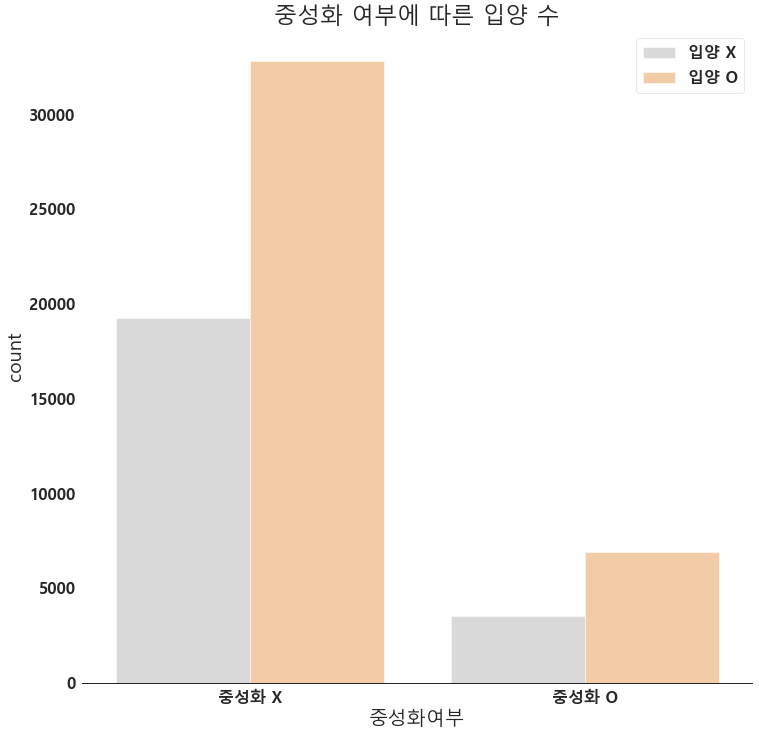

In [16]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})

plt.figure(figsize=(12,12))
sns.countplot(x='중성화여부' , data=df_no_mix, hue='상태',palette=["#d9d9d9",'#ffcc99'])
sns.despine(left=True, right=True, top=True)
plt.title('중성화 여부에 따른 입양 수')
plt.legend(['입양 X', '입양 O'])


plt.show()

### 2가지로
---

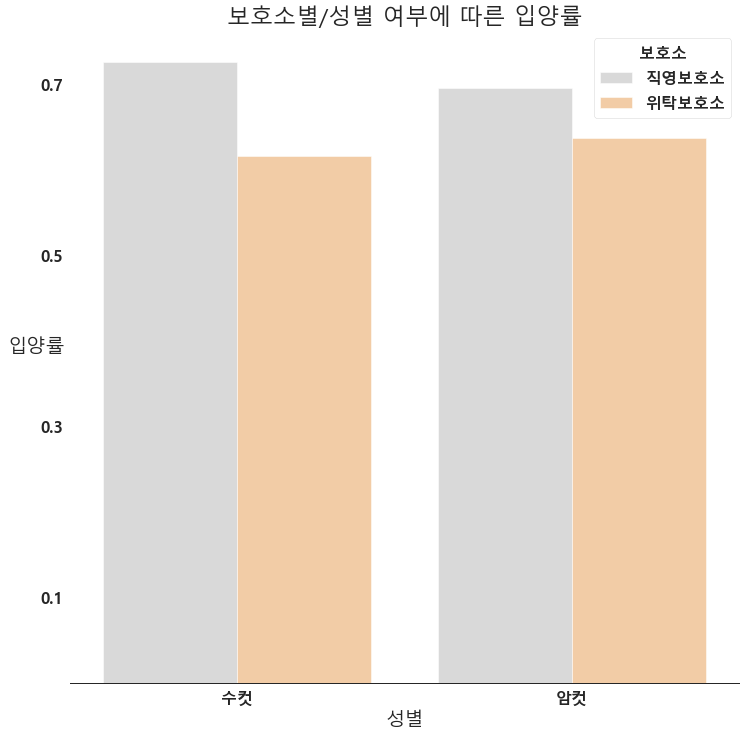

In [36]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})


plt.figure(figsize=(12,12))

g = sns.barplot(x='성별', y='상태',data=df_no_mix ,hue='보호소', palette=["#d9d9d9",'#ffcc99'],ci=False)


sns.despine(left=True, top=True, right=True)

plt.title('보호소별/성별 여부에 따른 입양률')
plt.yticks(np.arange(0.1,0.8,0.2))
plt.ylabel('입양률', rotation=360)

plt.show()

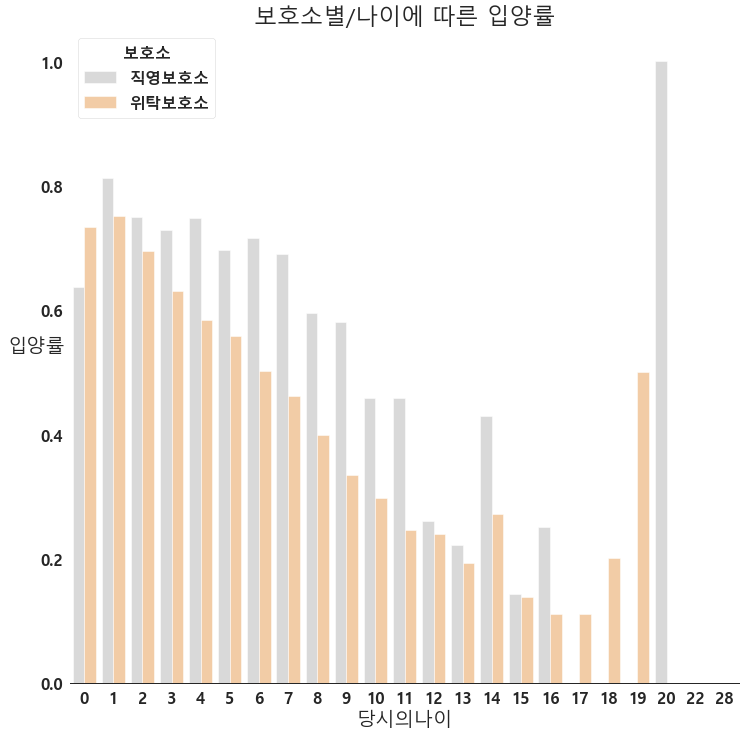

In [37]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})


plt.figure(figsize=(12,12))

g = sns.barplot(x='당시의나이', y='상태',data=df_no_mix ,hue='보호소', palette=["#d9d9d9",'#ffcc99'], ci=False)


sns.despine(left=True, top=True, right=True)

plt.title('보호소별/나이에 따른 입양률')
plt.ylabel('입양률', rotation=360)

plt.show()

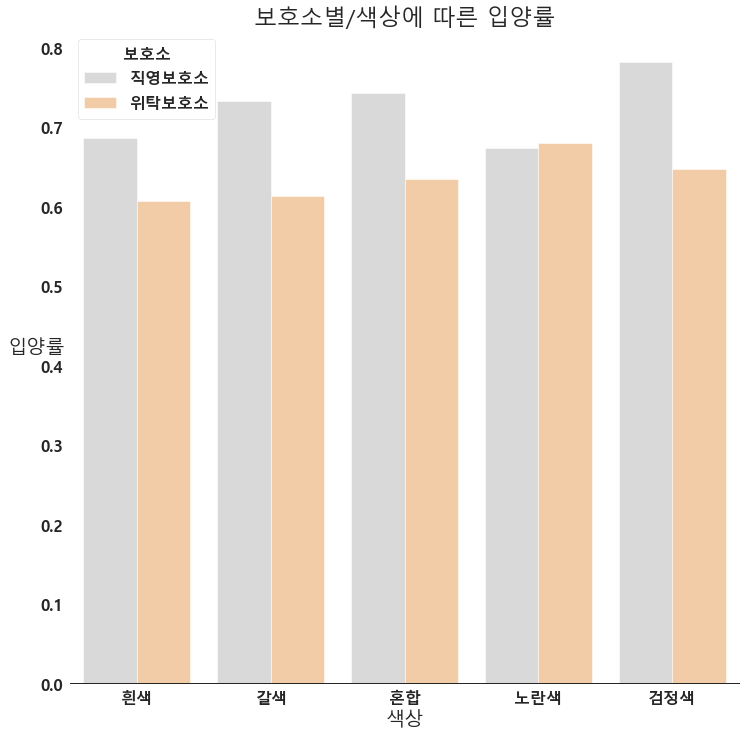

In [39]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})


plt.figure(figsize=(12,12))

g = sns.barplot(x='색상', y='상태',data=df_no_mix ,hue='보호소',palette=["#d9d9d9",'#ffcc99'], ci=False)


sns.despine(left=True, top=True, right=True)

plt.title('보호소별/색상에 따른 입양률')
plt.ylabel('입양률', rotation=360)

plt.show()

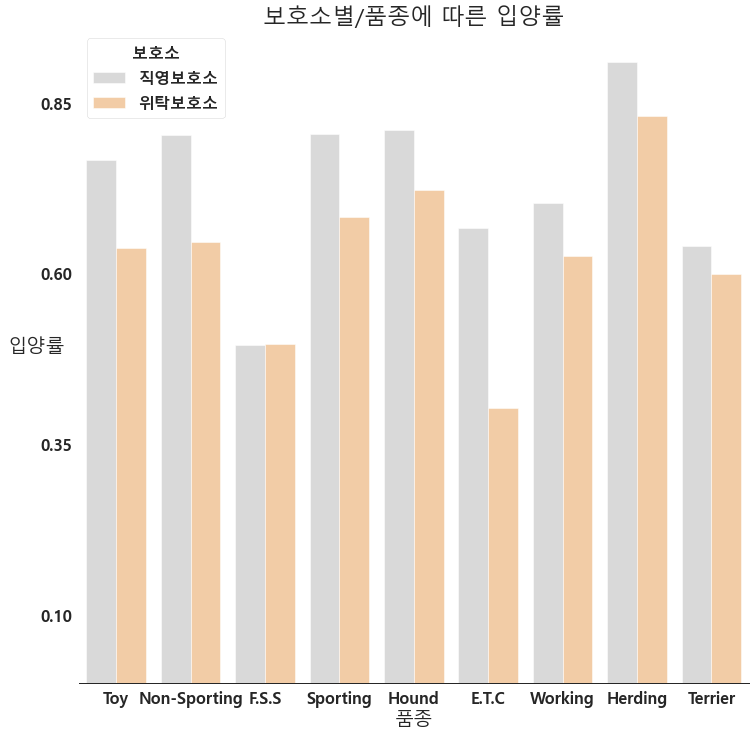

In [45]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})


plt.figure(figsize=(12,12))

g = sns.barplot(x='품종', y='상태',data=df_no_mix ,hue='보호소', palette=["#d9d9d9",'#ffcc99'], ci=False)


sns.despine(left=True, top=True, right=True)

plt.yticks(np.arange(0.1,0.9,0.25))
plt.title('보호소별/품종에 따른 입양률')
plt.ylabel('입양률', rotation=360)

plt.show()

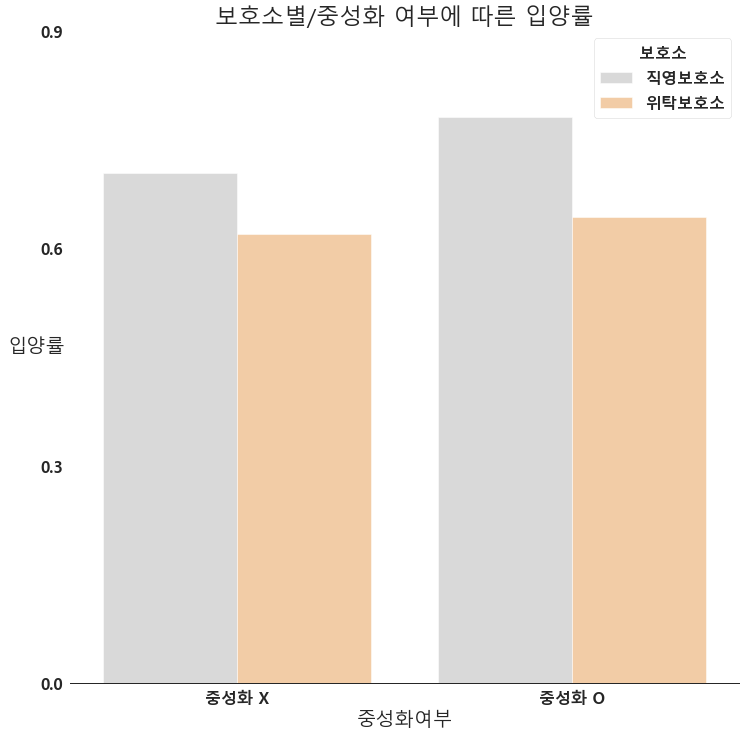

In [42]:
df_no_mix = pd.read_csv('Data/#시각화용.csv',encoding='cp949',index_col=0)
df_no_mix['상태'] = df_no_mix['상태'].map({'입양 O':1,'입양 X':0})

plt.figure(figsize=(12,12))

g = sns.barplot(x='중성화여부', y='상태',data=df_no_mix ,hue='보호소', palette=["#d9d9d9",'#ffcc99'], ci=False)


sns.despine(left=True, top=True, right=True)

plt.title('보호소별/중성화 여부에 따른 입양률')
plt.yticks(np.arange(0.0,1.0, 0.3))
plt.ylabel('입양률', rotation=360)

plt.show()

## RAW_DATA 시각화..?
---
    palette=['#ffa366',"#ff6600"]

In [22]:
df_직영 = pd.read_csv('Data/직영보호소.csv',encoding='cp949',index_col=0)
df_직영_len = len(df_직영['보호소이름'].unique())

df_위탁 = pd.read_csv('Data/위탁보호소.csv',encoding='cp949',index_col=0)
df_위탁_len = len(df_위탁['보호소이름'].unique())

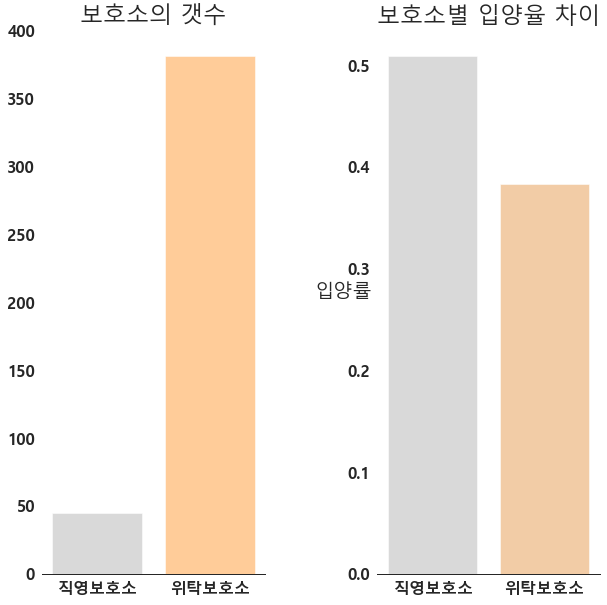

In [34]:
fig, axes= plt.subplots(1,2, figsize=(10,10))




axes[0].bar(['직영보호소','위탁보호소'],[df_직영_len, df_위탁_len],color=["#d9d9d9",'#ffcc99'])
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].set_title('보호소의 갯수')


sns.barplot('보호소',y='상태',data = RAW, palette=["#d9d9d9",'#ffcc99'], ax=axes[1],ci=False)

axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].set_ylabel('입양률', rotation=360)
axes[1].set_xlabel('')
axes[1].set_title('보호소별 입양율 차이')


plt.subplots_adjust(wspace=0.5)
plt.show()